# Small notebook showing the data

## Dataset description

https://mne.tools/stable/generated/mne.datasets.eegbci.load_data.html

* 109 participants from whom 105 have a complete set of recordings.
* For each participant, there are 14 recordings (trials).
* Division of trials for each participant:
    * Two baseline trials - one with open eyes and one with closed eyes - without any tasks.
    * Three trials per each of the four tasks (left/right and top/bottom).

</br></br>

* Overall description of procedure:
    1. Opening or closing the left or right fist after the target appears on the left or right side of the screen until the target disappears.
    2. Opening or closing either both fists or both feet depending on whether the target appears on the top or the bottom of the screen.

</br></br>

* Tasks:
    1. Open and close the left or right fist.
    2. Imagine opening or closing the left or right fist.
    3. Open and close both fists or both feet.
    4. Imagine opening or closing both fists or both feet.

</br></br>

* Experimental run:
    1. Open eye baseline
    2. Closed eye baseline
    3. Task 1
    4. Task 2
    5. Task 3
    6. Task 4
    7. Task 1
    8. Task 2
    9. Task 3
    10. Task 4
    11. Task 1
    12. Task 2
    13. Task 3
    14. Task 4

</br></br>

* Annotations:
    1. T0 - rest
    2. T1 - onset of motion (real or imagined) of the left fist:
        * Left fist runs: 3, 4, 7, 8, 11, 12
        * Both fists: 5, 6, 9, 10, 13, 14
    3. T2 - onset of motion (real or imagined) of the right fist or both feet:
        * Right fist runs: 3, 4, 7, 8, 11, 12
        * Both feet: 5, 6, 9, 10, 13, 14


In [1]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DOWNSAMPLING_FACTOR = 2

In [3]:
first_participant_folder = ''
first_recording_path = 'S001R12.edf'

first_recording = mne.io.read_raw_edf(os.path.join(first_participant_folder, first_recording_path), verbose=False)
first_recording

<RawEDF | S001R12.edf, 64 x 20000 (125.0 s), ~64 kB, data not loaded>

In [4]:
first_recording_df = first_recording.to_data_frame()
first_recording_df.head()

,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0,0.00000,-17.0,-30.0,-37.0,-57.0,-67.0,-84.0,-57.0,-6.0,-32.0,...,-11.0,-16.0,-15.0,-6.0,-10.0,18.0,-22.0,-4.0,-77.0,-51.0
1,0.00625,-5.0,-14.0,-22.0,-40.0,-48.0,-68.0,-52.0,7.0,-21.0,...,-5.0,-7.0,-7.0,-4.0,-11.0,19.0,-25.0,-13.0,-81.0,-58.0
2,0.01250,-3.0,-10.0,-9.0,-24.0,-26.0,-52.0,-36.0,10.0,-19.0,...,-14.0,-5.0,-8.0,-6.0,-18.0,14.0,-19.0,-10.0,-82.0,-56.0
3,0.01875,2.0,-8.0,-1.0,-5.0,-8.0,-35.0,-24.0,16.0,-13.0,...,19.0,20.0,16.0,26.0,20.0,56.0,0.0,12.0,-59.0,-32.0
4,0.02500,12.0,-3.0,4.0,15.0,12.0,-14.0,-5.0,21.0,-11.0,...,31.0,33.0,25.0,27.0,27.0,65.0,24.0,38.0,-31.0,3.0


Number of time points in recording:  20000


Text(0.5, 1.0, 'Channel Fc5. - first 1000 points')

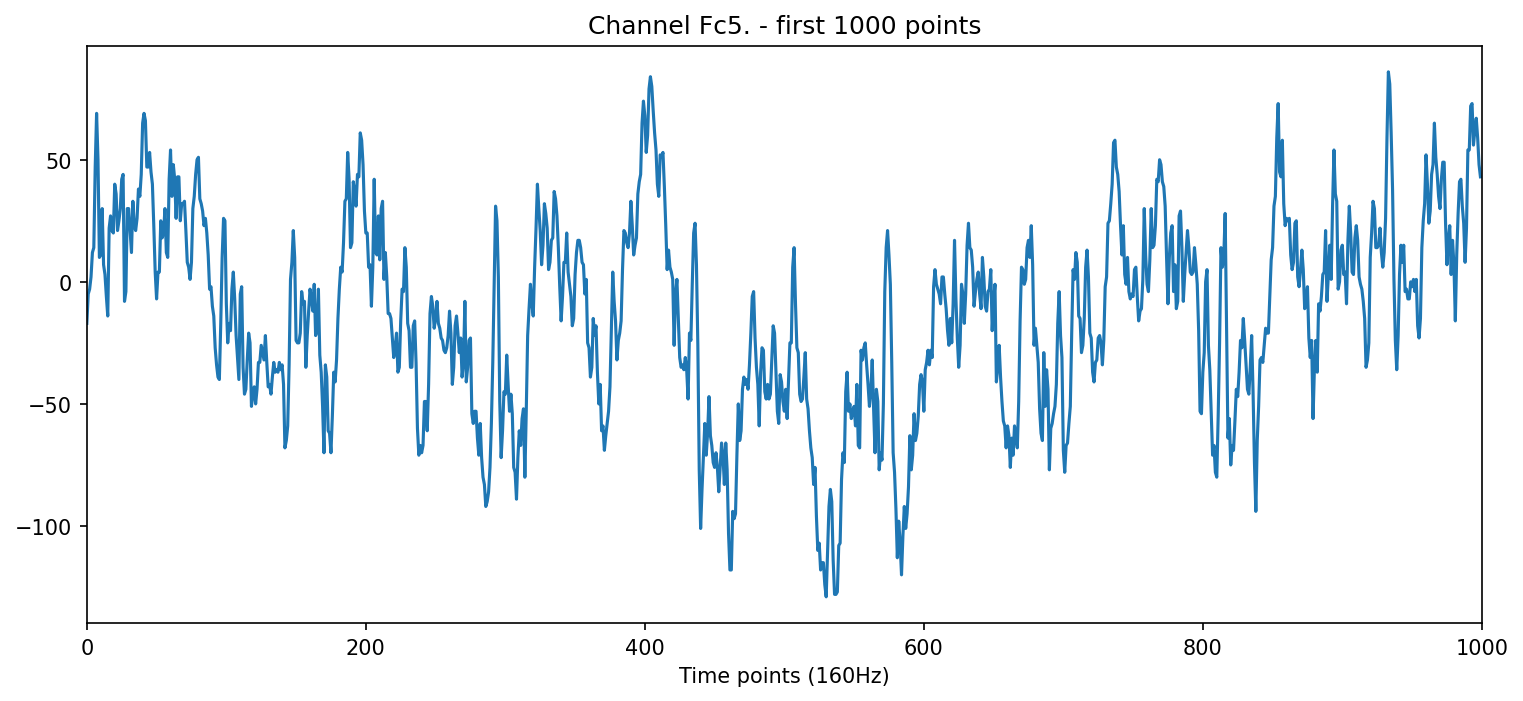

In [5]:
print('Number of time points in recording: ',len(first_recording_df['time']))

fig, axs = plt.subplots(figsize=(12,5), dpi=150)
axs.plot(first_recording_df['Fc5.'][:1000])
axs.set_xlim([0,1000])
axs.set_xlabel('Time points (160Hz)')
axs.set_title('Channel Fc5. - first 1000 points')

In [6]:
mne.events_from_annotations(first_recording)

Used Annotations descriptions: ['T0', 'T1', 'T2']


(array([[    0,     0,     1],
        [  672,     0,     3],
        [ 1328,     0,     1],
        [ 2000,     0,     2],
        [ 2656,     0,     1],
        [ 3328,     0,     3],
        [ 3984,     0,     1],
        [ 4656,     0,     2],
        [ 5312,     0,     1],
        [ 5984,     0,     2],
        [ 6640,     0,     1],
        [ 7312,     0,     3],
        [ 7968,     0,     1],
        [ 8640,     0,     3],
        [ 9296,     0,     1],
        [ 9968,     0,     2],
        [10624,     0,     1],
        [11296,     0,     2],
        [11952,     0,     1],
        [12624,     0,     3],
        [13280,     0,     1],
        [13952,     0,     3],
        [14608,     0,     1],
        [15280,     0,     2],
        [15936,     0,     1],
        [16608,     0,     3],
        [17264,     0,     1],
        [17936,     0,     2],
        [18592,     0,     1],
        [19264,     0,     3]]),
 {'T0': 1, 'T1': 2, 'T2': 3})

# Data processing

Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Using matplotlib as 2D backend.


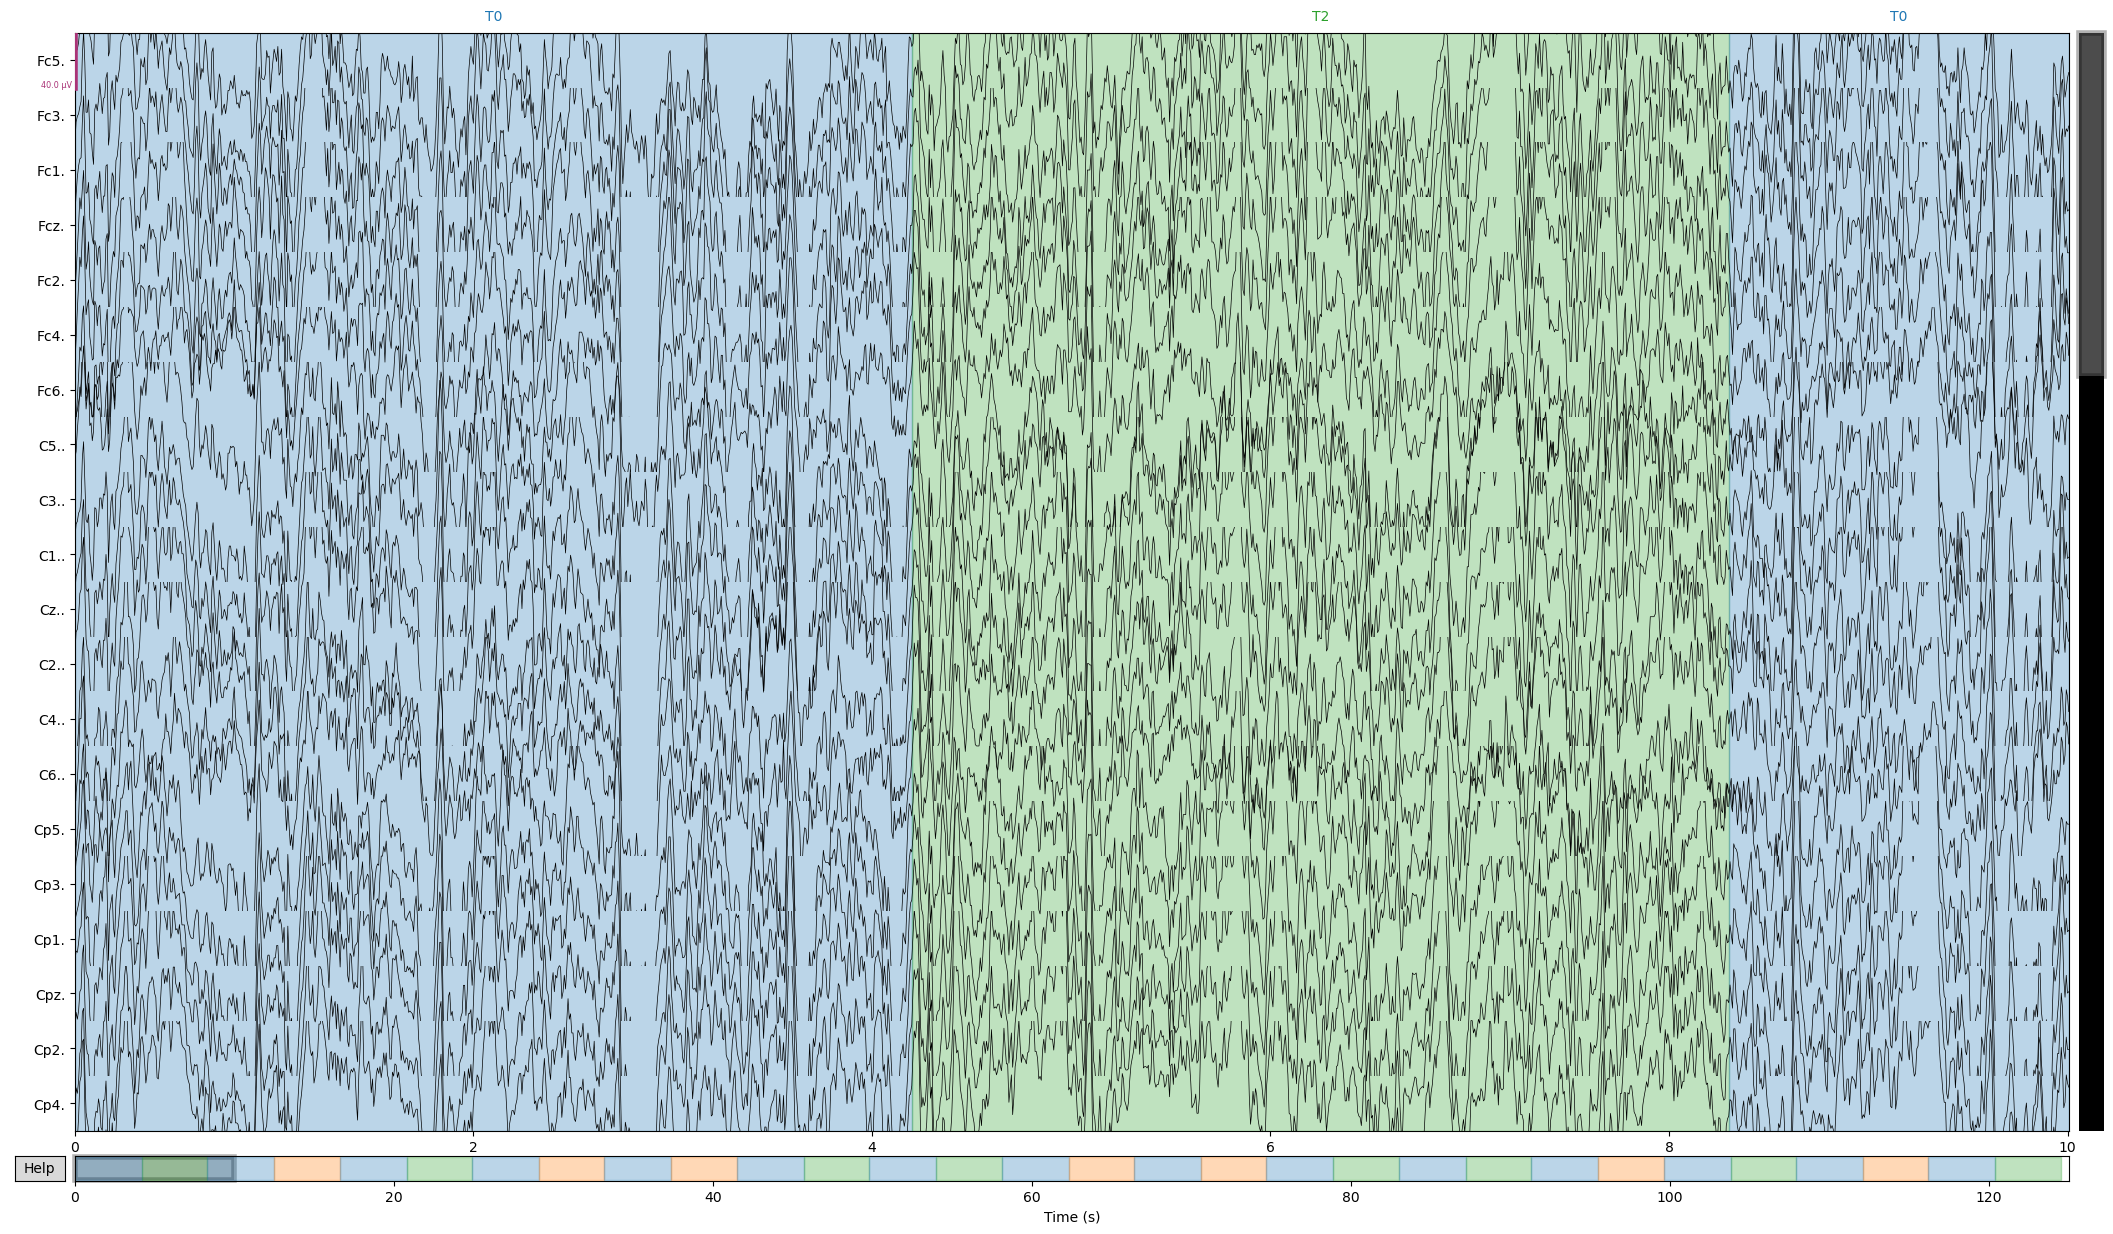

In [7]:
first_recording.load_data()
with mne.viz.use_browser_backend('matplotlib'):
    fig = first_recording.plot(duration=10, proj=False)


In [8]:
first_recording = first_recording.resample(sfreq=(first_recording.info['sfreq']/DOWNSAMPLING_FACTOR))

first_recording_df = first_recording.to_data_frame()
first_recording_df.head()

print('Shape of first_recording_df: ', first_recording_df.shape)

first_recording_df_wtime = first_recording_df.drop(['time'], axis=1)
first_recording_numpy = first_recording_df_wtime.to_numpy()
first_recording_numpy = first_recording_numpy.reshape((np.shape(first_recording_numpy)[1], -1))
print('Shape of input data for model: ',np.shape(first_recording_numpy))

Shape of first_recording_df:  (10000, 65)
Shape of input data for model:  (64, 10000)
